In [2]:
from scipy.stats import truncnorm
import pandas as pd
import numpy as np
import itertools
import datetime
import tqdm
import sys
import os

def flatten_list(list_array):
    return list(itertools.chain(*list_array))

sys.path.insert(0, "../")

from global_config import config

results_dir           = config.get_property('results_dir')
results2_dir           = config.get_property('results2_dir')

data_dir              = config.get_property('data_dir')
paper_dir             = config.get_property('paper_dir')
data_db_dir           = config.get_property('data_db_dir')
feb_hosp_records_path = os.path.join(data_db_dir, 'long_files_8_25_2021')
path_to_save          = os.path.join(results_dir, "real_testing", "community")

COLOR_LIST1           = ["#F8AFA8", "#FDDDA0", "#F5CDB4", "#74A089"]



In [3]:
sys.path.insert(0, "../metapop")

from utils_data_metapop import create_population_data, create_time_transfers

path_to_ward_counts = os.path.join(data_db_dir, "long_files_8_25_2021", "counts_ward.csv" )
path_to_ward_transf = os.path.join(data_db_dir, "long_files_8_25_2021", "transfers_ward.csv" )

A_df, D_df, H_df, tests_df, Hmean_df = create_population_data(path_to_ward_counts)

num_wards  = len(Hmean_df)
ward_names = list(Hmean_df.index)
M_df       = create_time_transfers(path_to_ward_transf, num_wards=num_wards, ward_names=ward_names)


In [157]:
selected_buildings = ['Allen Hospital', 'Harkness Pavilion', 'Milstein Hospital', 'Mschony', 'Presbyterian Hospital', "Rest"]
building2id        = {selected_buildings[i]: i for i in range(len(selected_buildings))}
building2id[5]     = "Rest"

def building2building(building):
    if building in selected_buildings:
        return building
    else:
        return "Rest"


counts_ward_df             = pd.read_csv(path_to_ward_counts, parse_dates=["date"])
counts_ward_df["building"] = counts_ward_df.apply(lambda x: x.ward.split("-")[1], axis=1)
counts_ward_df["building"] = counts_ward_df.apply(lambda x: building2building(x.building), axis=1)

counts_ward_df             = counts_ward_df.reset_index(drop=True)
buildings_df               = counts_ward_df.copy(); buildings_df = buildings_df.groupby(['date', 'building']).sum().reset_index()

date_start    = pd.to_datetime('2020-02-01')
date_end      = pd.to_datetime('2021-02-28')
dates         = pd.date_range(date_start, date_end)
Tdat          =  len(dates)

buildings_df  = buildings_df[buildings_df.date.isin(dates)]

A     = pd.pivot(buildings_df, index='building', columns='date', values='num_admitted')
D     = pd.pivot(buildings_df, index='building', columns='date', values='num_discharged')
H     = pd.pivot(buildings_df, index='building', columns='date', values='num_hospitalized')
tests = pd.pivot(buildings_df, index='building', columns='date', values='num_tested')

pop                     = H.mean(axis=1)
num_pop                 = len(pop)

building_names = pop.index

/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/1438482836.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  buildings_df               = counts_ward_df.copy(); buildings_df = buildings_df.groupby(['date', 'building']).sum().reset_index()


In [158]:
buildings_df["building2"] = buildings_df.apply(lambda x: building2building(x.building), axis=1)
buildings_plt_df          = buildings_df.groupby(['date', 'building2']).sum().reset_index()
hosp_df                   = buildings_plt_df.groupby(['date']).sum().reset_index()


/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/2188095908.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  buildings_plt_df          = buildings_df.groupby(['date', 'building2']).sum().reset_index()
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/2188095908.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hosp_df                   = buildings_plt_df.groupby(['date']).sum().reset_index()


/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/1707761361.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hosp_df = buildings_plt_df.groupby(['date']).sum().reset_index()
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/1707761361.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b_df     = b_df.set_index("date").resample("W-Sun").sum().reset_index()
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/1707761361.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to 

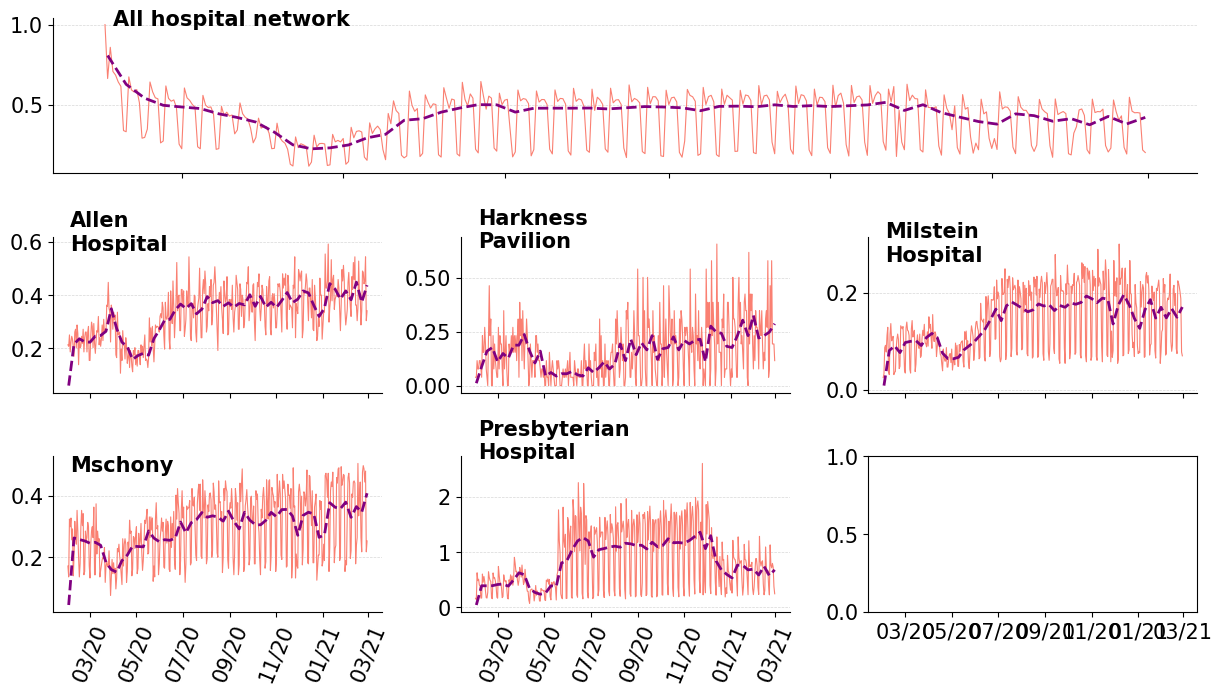

In [159]:
from matplotlib import dates as mdates
from utils_local import plot_utils
import matplotlib.pyplot as plt


fig, axes = plt.subplot_mosaic([["hospital", "hospital", "hospital"],
                               [selected_buildings[0], selected_buildings[1], selected_buildings[2]],
                               [selected_buildings[3], selected_buildings[4], selected_buildings[5]]],
                              figsize=(12.5, 7.2), sharex=True, sharey=False)

hosp_df = buildings_plt_df.groupby(['date']).sum().reset_index()
axes["hospital"].plot(hosp_df.date, hosp_df.num_admitted / hosp_df.num_hospitalized, color="salmon", lw=0.8)
#axes["hospital"].plot(hosp_df.date, hosp_df.num_discharged / hosp_df.num_hospitalized, color="dodgerblue", lw=0.8)

hosp_df        = hosp_df.set_index("date").resample("W-Sun").sum().reset_index()
axes["hospital"].plot(hosp_df.date, hosp_df.num_admitted / hosp_df.num_hospitalized, color="purple", lw=2, ls="--")

axes["hospital"].tick_params(which='both', axis='x', labelrotation=75)
axes["hospital"].xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
axes["hospital"].spines['right'].set_visible(False)
axes["hospital"].spines['top'].set_visible(False)
axes["hospital"].set_ylabel(None)
axes["hospital"].set_xlabel(None)
axes["hospital"].grid(axis='y', alpha=0.5, lw=0.5, ls="--")
axes["hospital"].text(x  = 18296.0,
                      y  = axes["hospital"].get_ylim()[1]-0.05,
                      s          = "All hospital network",
                      fontweight = "bold")

for idx_b in range(5):
    axi      = axes[selected_buildings[idx_b]]
    building = selected_buildings[idx_b]
    b_df     = buildings_plt_df[buildings_plt_df.building2 == building]
    axi.plot(b_df.date, b_df.num_admitted / pop[building], color="salmon", lw=0.8)

    b_df     = b_df.set_index("date").resample("W-Sun").sum().reset_index()
    axi.plot(b_df.date, b_df.num_admitted / (7 * pop[building]), color="purple", lw=2, ls="--")

    axi.tick_params(which='both', axis='x', labelrotation=67.5)
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_ylabel(None)
    axi.set_xlabel(None)

    axi.text(x = 18296.0,
            y  = axi.get_ylim()[1]-0.05,
            s          = "\n".join(building.split(" ")),
            fontweight = "bold")
    axi.grid(axis='y', alpha=0.5, lw=0.5, ls="--")

plt.tight_layout()

In [160]:
adm_rate_hosp = hosp_df.num_admitted / (7 * pop.sum())
print("Hospital level admission rate: {:.2f}, {:.2f}".format(np.round(adm_rate_hosp[4:].min() * 100), np.round(adm_rate_hosp[30:].max() * 100)))

d_rate_hosp = hosp_df.num_discharged / (7 * pop.sum())
print("Hospital level admission rate: {:.2f}, {:.2f}".format(np.round(d_rate_hosp[4:].min() * 100), np.round(d_rate_hosp[30:].max() * 100)))

Hospital level admission rate: 19.00, 64.00
Hospital level admission rate: 20.00, 64.00


In [164]:
pop[building]

253.2284263959391

/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/1760788350.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  A_ward_df     = pd.pivot(counts_ward_df.set_index(["date", "ward"]).unstack([1]).resample("W-Sun").sum().stack().reset_index(),
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/1760788350.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  D_ward_df     = pd.pivot(counts_ward_df.set_index(["date", "ward"]).unstack([1]).resample("W-Sun").sum().stack().reset_index(),
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/1760788350.py:16: SettingWithCopyWarnin

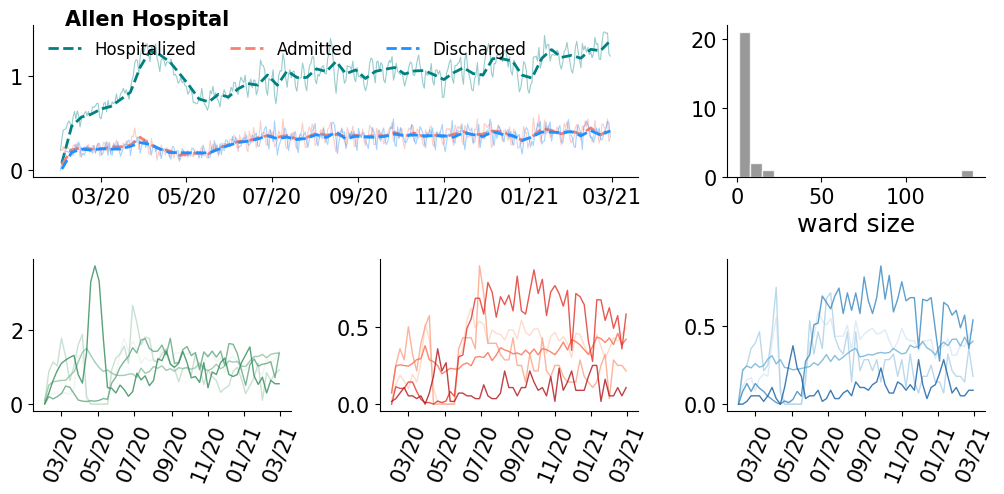

In [167]:
building = selected_buildings[0]

A_ward_df     = pd.pivot(counts_ward_df.set_index(["date", "ward"]).unstack([1]).resample("W-Sun").sum().stack().reset_index(),
                            index='ward', columns='date', values='num_admitted')
D_ward_df     = pd.pivot(counts_ward_df.set_index(["date", "ward"]).unstack([1]).resample("W-Sun").sum().stack().reset_index(),
                            index='ward', columns='date', values='num_admitted')
H_ward_df     = pd.pivot(counts_ward_df,
                            index='ward', columns='date', values='num_hospitalized')

pop_ward                = np.clip(np.ceil(H_ward_df.mean(axis=1)), 1, None)
pop_ward_df             = pd.DataFrame(pop_ward, columns=["ward_size"]).reset_index()
pop_ward_df["building"] = pop_ward_df["ward"].apply(lambda x: x.split("-")[1])


counts_ward_b_day_df = counts_ward_df[counts_ward_df.building == selected_buildings[0]]
counts_ward_b_day_df["num_hospitalized_norm"] = counts_ward_b_day_df.apply(lambda x: x.num_hospitalized / pop_ward[x.ward], axis=1)
counts_ward_b_day_df["num_discharged_norm"]   = counts_ward_b_day_df.apply(lambda x: x.num_discharged   / pop_ward[x.ward], axis=1)
counts_ward_b_day_df["num_admitted_norm"]     = counts_ward_b_day_df.apply(lambda x: x.num_admitted     / pop_ward[x.ward], axis=1)

counts_ward_b_wk_df                          = counts_ward_b_day_df.set_index(["date", "ward"]).unstack([1]).resample("W-Sun").sum().stack().reset_index()
counts_ward_b_wk_df["num_hospitalized_norm"] = counts_ward_b_wk_df.apply(lambda x: x.num_hospitalized   / (7*pop_ward[x.ward]), axis=1)
counts_ward_b_wk_df["num_discharged_norm"]   = counts_ward_b_wk_df.apply(lambda x: x.num_discharged / (7*pop_ward[x.ward]), axis=1)
counts_ward_b_wk_df["num_admitted_norm"]     = counts_ward_b_wk_df.apply(lambda x: x.num_admitted   / (7*pop_ward[x.ward]), axis=1)

b_df     = counts_ward_b_day_df.groupby(["date"]).sum().reset_index()
b_w_df   = counts_ward_b_day_df.groupby(["date"]).sum().resample("W-Sun").sum().reset_index()
pop_b_df = pop_ward_df[pop_ward_df.building == building]

fig, axes = plt.subplot_mosaic([["building", "building", "ward_size"],
                            ["hospitalizations", "admissions", "discharges"]],
                            figsize=(10.5, 5.2), sharex=False, sharey=False)

axes["building"].plot(b_df["date"],   b_df.num_hospitalized   / pop[building],      lw=0.8, alpha=0.4, color="teal")
axes["building"].plot(b_w_df["date"], b_w_df.num_hospitalized / (7*pop[building]), lw=2, color="teal", ls="--", label="Hospitalized")

axes["building"].plot(b_df["date"],   b_df.num_admitted   /  pop[building],   lw=0.8, alpha=0.4, color="salmon")
axes["building"].plot(b_w_df["date"], b_w_df.num_admitted / (7*pop[building]), lw=2, color="salmon", ls="--", label="Admitted")

axes["building"].plot(b_df["date"],   b_df.num_discharged  / pop[building],      lw=0.8, alpha=0.4, color="dodgerblue")
axes["building"].plot(b_w_df["date"], b_w_df.num_discharged/ (7* pop[building]), lw=2, color="dodgerblue", ls="--", label="Discharged")

axes["ward_size"].hist(pop_b_df.ward_size, bins=20, edgecolor="w", facecolor="gray", alpha=0.8)

big_wards =  pop_b_df[pop_b_df.ward_size != 1]["ward"]

palette_hosp  = sns.light_palette("seagreen", n_colors=len(big_wards))
palette_adms  = sns.color_palette("Reds",     n_colors=len(big_wards), desat=True)
palette_disch = sns.color_palette("Blues",    n_colors=len(big_wards), desat=True)

sns.lineplot(ax=axes["hospitalizations"], data=counts_ward_b_wk_df[counts_ward_b_wk_df.ward.isin(list(big_wards))],
                                            x="date", y="num_hospitalized_norm",  lw=1, alpha=0.8, hue="ward", palette=palette_hosp)
sns.lineplot(ax=axes["admissions"],       data=counts_ward_b_wk_df[counts_ward_b_wk_df.ward.isin(list(big_wards))],
                                            x="date", y="num_admitted_norm",      lw=1, alpha=0.8, hue="ward", palette=palette_adms)
sns.lineplot(ax=axes["discharges"],       data=counts_ward_b_wk_df[counts_ward_b_wk_df.ward.isin(list(big_wards))],
                                            x="date", y="num_discharged_norm",    lw=1, alpha=0.8, hue="ward", palette=palette_disch)

axes["building"].text(x        = 18296.0,
                    y          = axes["building"].get_ylim()[1],
                    s          = building,
                    fontweight = "bold")
axes["building"].legend(loc="upper left", ncol=3, fontsize=12, frameon=False)

for k in axes:
    axes[k].spines['right'].set_visible(False)
    axes[k].spines['top'].set_visible(False)
    axes[k].set_ylabel(None)
    axes[k].set_xlabel(None)

    if k == "ward_size":
        axes[k].set_xlabel("ward size")
        continue
    axes[k].tick_params(which='both', axis='x', labelrotation=67.5)
    axes[k].xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

    if k == "building":
        axes[k].tick_params(which='both', axis='x', labelrotation=0)
        continue

    axes[k].legend().remove()
    y_lim_up = np.ceil(counts_ward_b_wk_df[["num_admitted_norm", "num_discharged_norm", "num_hospitalized_norm"]].max().max())
    #axes[k].set_ylim(axes[k].get_ylim()[0], y_lim_up)

plt.tight_layout()

/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/7076.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  A_ward_df     = pd.pivot(counts_ward_df.set_index(["date", "ward"]).unstack([1]).resample("W-Sun").sum().stack().reset_index(),
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/7076.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  D_ward_df     = pd.pivot(counts_ward_df.set_index(["date", "ward"]).unstack([1]).resample("W-Sun").sum().stack().reset_index(),
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/7076.py:21: SettingWithCopyWarning: 
A value is try

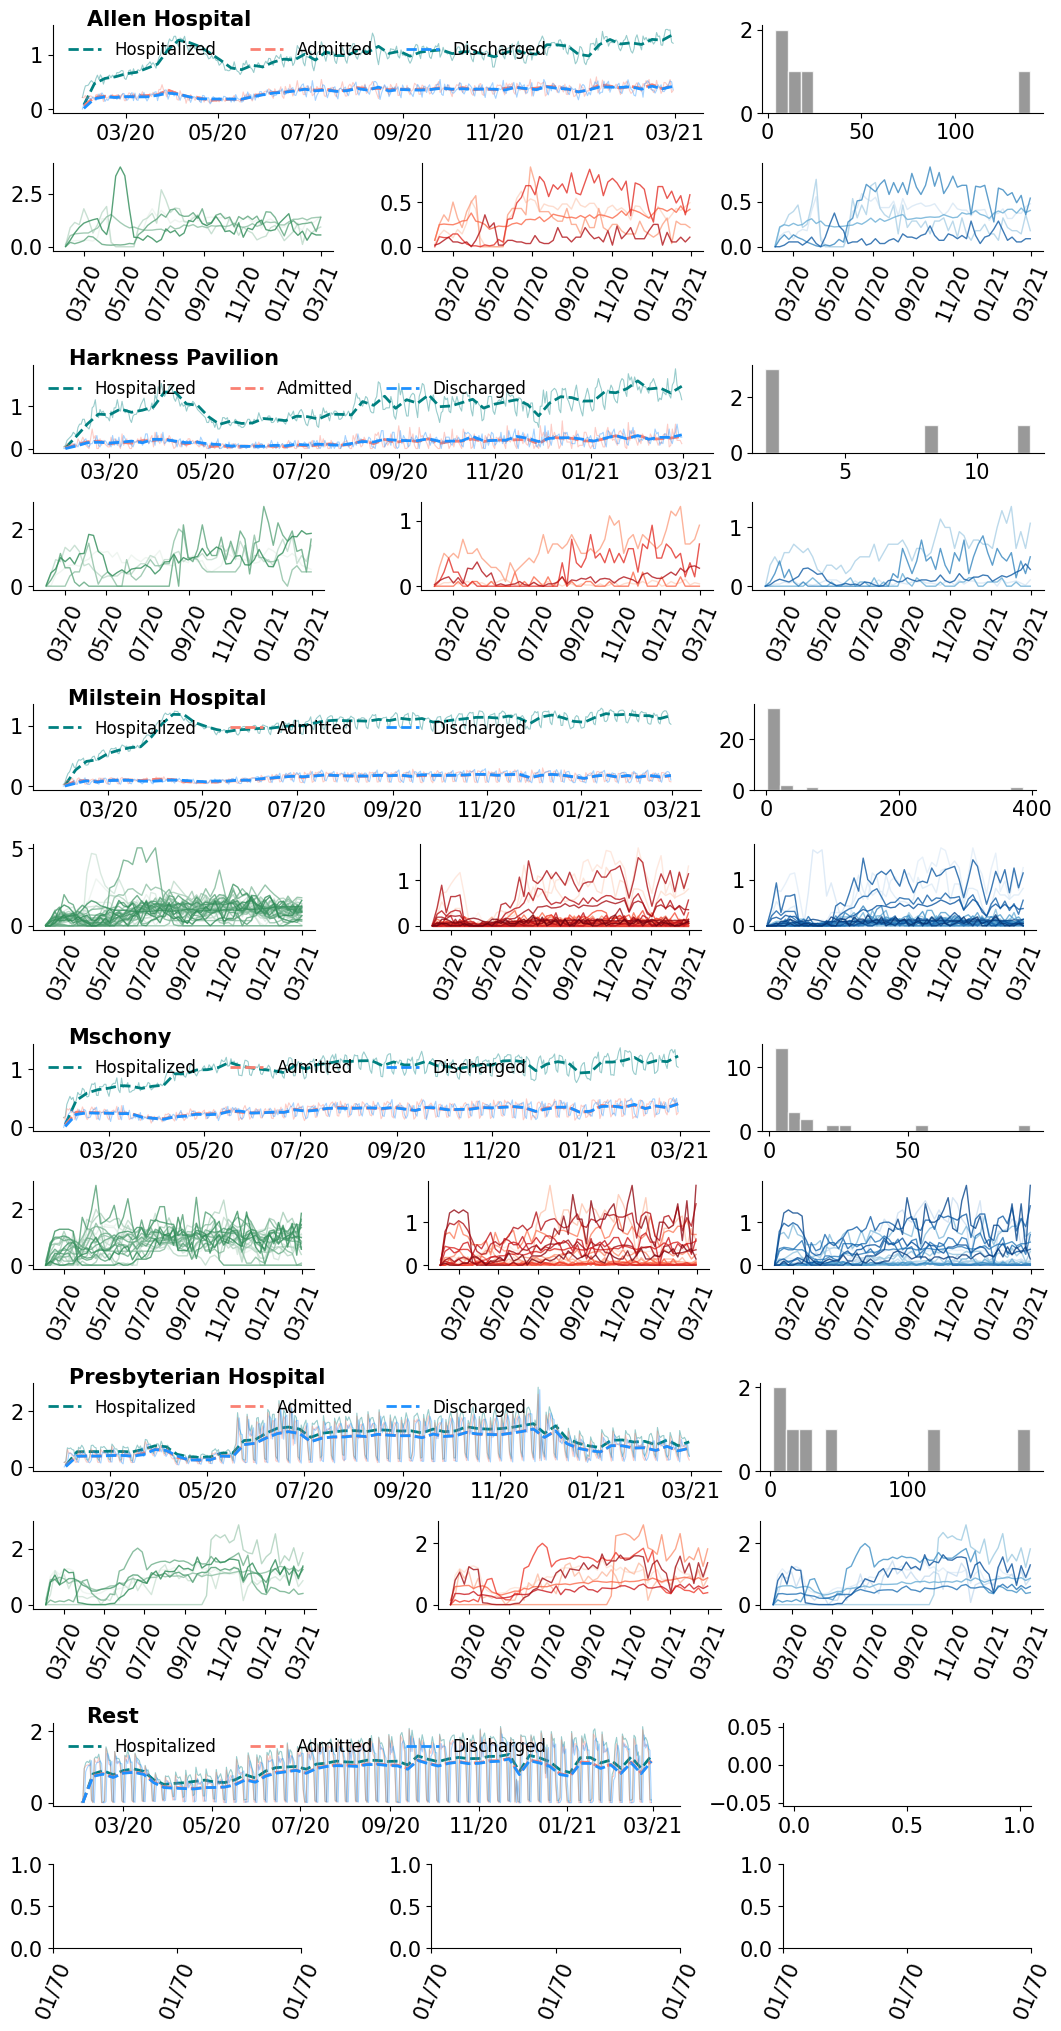

In [198]:
import seaborn as sns

A_ward_df     = pd.pivot(counts_ward_df.set_index(["date", "ward"]).unstack([1]).resample("W-Sun").sum().stack().reset_index(),
                                index='ward', columns='date', values='num_admitted')
D_ward_df     = pd.pivot(counts_ward_df.set_index(["date", "ward"]).unstack([1]).resample("W-Sun").sum().stack().reset_index(),
                                index='ward', columns='date', values='num_admitted')
H_ward_df     = pd.pivot(counts_ward_df,
                                index='ward', columns='date', values='num_hospitalized')

pop_ward                = np.clip(np.ceil(H_ward_df.mean(axis=1)), 1, None)
pop_ward_df             = pd.DataFrame(pop_ward, columns=["ward_size"]).reset_index()
pop_ward_df["building"] = pop_ward_df["ward"].apply(lambda x: x.split("-")[1])

fig     = plt.figure(constrained_layout=True, figsize=(10.5, 20.2))

subfigs = fig.subfigures(len(selected_buildings), 1, hspace=0.05, wspace=0.1, height_ratios=[1/6]*len(selected_buildings))

for idx_building, building in enumerate(selected_buildings):
    counts_ward_b_day_df = counts_ward_df[counts_ward_df.building == building]

    counts_ward_b_day_df["num_hospitalized_norm"] = counts_ward_b_day_df.apply(lambda x: x.num_hospitalized / pop_ward[x.ward], axis=1)
    counts_ward_b_day_df["num_discharged_norm"]   = counts_ward_b_day_df.apply(lambda x: x.num_discharged   / pop_ward[x.ward], axis=1)
    counts_ward_b_day_df["num_admitted_norm"]     = counts_ward_b_day_df.apply(lambda x: x.num_admitted     / pop_ward[x.ward], axis=1)

    counts_ward_b_wk_df                                 = counts_ward_b_day_df.set_index(["date", "ward"]).unstack([1])[["num_hospitalized", "num_admitted", "num_discharged"]].resample("W-Sun").sum().stack().reset_index()
    counts_ward_b_wk_df.loc[:, "num_hospitalized_norm"] = counts_ward_b_wk_df.apply(lambda x: x.num_hospitalized   / (7*pop_ward[x.ward]), axis=1)
    counts_ward_b_wk_df.loc[:, "num_discharged_norm"]   = counts_ward_b_wk_df.apply(lambda x: x.num_discharged / (7*pop_ward[x.ward]), axis=1)
    counts_ward_b_wk_df.loc[:, "num_admitted_norm"]     = counts_ward_b_wk_df.apply(lambda x: x.num_admitted   / (7*pop_ward[x.ward]), axis=1)

    b_df     = counts_ward_b_day_df.groupby(["date"])[["num_hospitalized", "num_admitted", "num_discharged"]].sum().reset_index()
    b_w_df   = counts_ward_b_day_df.groupby(["date"])[["num_hospitalized", "num_admitted", "num_discharged"]].sum().resample("W-Sun").sum().reset_index()

    pop_b_df = pop_ward_df[pop_ward_df.building == building]

    axes = subfigs[idx_building].subplot_mosaic([["building", "building", "ward_size"],
                                                ["hospitalizations", "admissions", "discharges"]],
                                                sharex=False, sharey=False)


    axes["building"].plot(b_df["date"],   b_df.num_hospitalized   / pop[building],     lw=0.8, alpha=0.4, color="teal")
    axes["building"].plot(b_w_df["date"], b_w_df.num_hospitalized / (7*pop[building]), lw=2, color="teal", ls="--", label="Hospitalized")

    axes["building"].plot(b_df["date"],   b_df.num_admitted   /  pop[building],    lw=0.8, alpha=0.4, color="salmon")
    axes["building"].plot(b_w_df["date"], b_w_df.num_admitted / (7*pop[building]), lw=2, color="salmon", ls="--", label="Admitted")

    axes["building"].plot(b_df["date"],   b_df.num_discharged  / pop[building],      lw=0.8, alpha=0.4, color="dodgerblue")
    axes["building"].plot(b_w_df["date"], b_w_df.num_discharged/ (7* pop[building]), lw=2, color="dodgerblue", ls="--", label="Discharged")

    axes["ward_size"].hist(pop_b_df[pop_b_df.ward_size != 1].ward_size, bins=20, edgecolor="w", facecolor="gray", alpha=0.8)

    big_wards =  pop_b_df[pop_b_df.ward_size != 1]["ward"]

    palette_hosp  = sns.light_palette("seagreen", n_colors=len(big_wards))
    palette_adms  = sns.color_palette("Reds",     n_colors=len(big_wards), desat=True)
    palette_disch = sns.color_palette("Blues",    n_colors=len(big_wards), desat=True)

    sns.lineplot(ax=axes["hospitalizations"], data=counts_ward_b_wk_df[counts_ward_b_wk_df.ward.isin(list(big_wards))],
                                                x="date", y="num_hospitalized_norm",  lw=1, alpha=0.8, hue="ward", palette=palette_hosp)
    sns.lineplot(ax=axes["admissions"],       data=counts_ward_b_wk_df[counts_ward_b_wk_df.ward.isin(list(big_wards))],
                                                x="date", y="num_admitted_norm",      lw=1, alpha=0.8, hue="ward", palette=palette_adms)
    sns.lineplot(ax=axes["discharges"],       data=counts_ward_b_wk_df[counts_ward_b_wk_df.ward.isin(list(big_wards))],
                                                x="date", y="num_discharged_norm",    lw=1, alpha=0.8, hue="ward", palette=palette_disch)

    axes["building"].text(x        = 18296.0,
                        y          = axes["building"].get_ylim()[1],
                        s          = building,
                        fontweight = "bold")
    axes["building"].legend(loc="upper left", ncol=3, fontsize=12, frameon=False)

    for k in axes:
        axes[k].spines['right'].set_visible(False)
        axes[k].spines['top'].set_visible(False)
        axes[k].set_ylabel(None)
        axes[k].set_xlabel(None)

        if k == "ward_size":
            #axes[k].set_xlabel("ward size")
            continue
        axes[k].tick_params(which='both', axis='x', labelrotation=67.5)
        axes[k].xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

        if k == "building":
            axes[k].tick_params(which='both', axis='x', labelrotation=0)
            continue

        axes[k].legend().remove()
        y_lim_up = np.ceil(counts_ward_b_wk_df[["num_admitted_norm", "num_discharged_norm", "num_hospitalized_norm"]].max().max())
        #axes[k].set_ylim(axes[k].get_ylim()[0], y_lim_up)
        #axes[k].text(x        = 18296.0,
        #                y          = axes[k].get_ylim()[1]-0.1,
        #                s          = k.capitalize(),
        #                fontweight = "normal")

    #plt.tight_layout()


In [188]:

H_ward_df     = pd.pivot(counts_ward_df,
                                index='ward', columns='date', values='num_hospitalized')

pop_ward                = np.clip(np.ceil(H_ward_df.mean(axis=1)), 1, None)
pop_ward_df             = pd.DataFrame(pop_ward, columns=["ward_size"]).reset_index()
pop_ward_df["building"] = pop_ward_df["ward"].apply(lambda x: x.split("-")[1])

layout = []
for building in selected_buildings:
    layout.append([building, building, f"ward_size_{building}"])

fig, axes = plt.subplot_mosaic(layout,
                                figsize=(10.5, 7.2),
                                sharex="col", sharey=False)

for building in selected_buildings:

    counts_ward_b_day_df = counts_ward_df[counts_ward_df.building == building]
    counts_ward_b_day_df.loc[:, "num_hospitalized_norm"] = counts_ward_b_day_df.apply(lambda x: x.num_hospitalized / pop_ward[x.ward], axis=1)
    counts_ward_b_day_df.loc[:, "num_discharged_norm"]   = counts_ward_b_day_df.apply(lambda x: x.num_discharged   / pop_ward[x.ward], axis=1)
    counts_ward_b_day_df.loc[:, "num_admitted_norm"]     = counts_ward_b_day_df.apply(lambda x: x.num_admitted     / pop_ward[x.ward], axis=1)

    counts_ward_b_wk_df                                 = counts_ward_b_day_df.set_index(["date", "ward"]).unstack([1])[["num_hospitalized", "num_admitted", "num_discharged"]].resample("W-Sun").sum().stack().reset_index()
    counts_ward_b_wk_df.loc[:, "num_hospitalized_norm"] = counts_ward_b_wk_df.apply(lambda x: x.num_hospitalized   / (7*pop_ward[x.ward]), axis=1)
    counts_ward_b_wk_df.loc[:, "num_discharged_norm"]   = counts_ward_b_wk_df.apply(lambda x: x.num_discharged / (7*pop_ward[x.ward]), axis=1)
    counts_ward_b_wk_df.loc[:, "num_admitted_norm"]     = counts_ward_b_wk_df.apply(lambda x: x.num_admitted   / (7*pop_ward[x.ward]), axis=1)

    b_df     = counts_ward_b_day_df.groupby(["date"])[["num_hospitalized", "num_admitted", "num_discharged"]].sum().reset_index()
    b_w_df   = counts_ward_b_day_df.groupby(["date"])[["num_hospitalized", "num_admitted", "num_discharged"]].sum().resample("W-Sun").sum().reset_index()

    pop_b_df = pop_ward_df[pop_ward_df.building == building]

    axes[building].plot(b_df["date"],   b_df.num_hospitalized   / pop[building],     lw=0.8, alpha=0.4, color="teal")
    axes[building].plot(b_w_df["date"], b_w_df.num_hospitalized / (7*pop[building]), lw=2, color="teal", ls="--", label="Hospitalized")

    axes[building].plot(b_df["date"],   b_df.num_admitted   /  pop[building],    lw=0.8, alpha=0.4, color="salmon")
    axes[building].plot(b_w_df["date"], b_w_df.num_admitted / (7*pop[building]), lw=2, color="salmon", ls="--", label="Admitted")

    axes[building].plot(b_df["date"],   b_df.num_discharged  / pop[building],      lw=0.8, alpha=0.4, color="dodgerblue")
    axes[building].plot(b_w_df["date"], b_w_df.num_discharged/ (7* pop[building]), lw=2, color="dodgerblue", ls="--", label="Discharged")

    axes[f"ward_size_{building}"].hist(pop_b_df[pop_b_df.ward_size != 1].ward_size, bins=20, edgecolor="w", facecolor="gray", alpha=0.8)

for idx_k, k in enumerate(selected_buildings):

    axes[k].xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
    axes[k].tick_params(which='both', axis='x', labelrotation=67.5)
    if idx_k!=len(selected_buildings)-1:
        axes[k].tick_params('x', labelbottom=False)

    axes[k].sharex(axes[selected_buildings[0]])
    axes[k].spines['right'].set_visible(False)
    axes[k].spines['top'].set_visible(False)
    axes[k].legend().remove()
    axes[k].set_ylabel(None)
    axes[k].set_xlabel(None)

for k in selected_buildings:
    axes[f"ward_size_{k}"].spines['right'].set_visible(False)
    axes[f"ward_size_{k}"].spines['top'].set_visible(False)
    axes[f"ward_size_{k}"].set_ylabel(None)
    axes[f"ward_size_{k}"].set_xlabel(None)
plt.tight_layout()


TypeError: 'sharex' must be an instance of bool, not a str

<Figure size 1050x720 with 0 Axes>

/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/1622672629.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hosp_df = buildings_plt_df.groupby(['date']).sum().reset_index()
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/1622672629.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b_df        = b_df.set_index("date").resample("W-Sun").sum().reset_index()
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_57313/1622672629.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default 

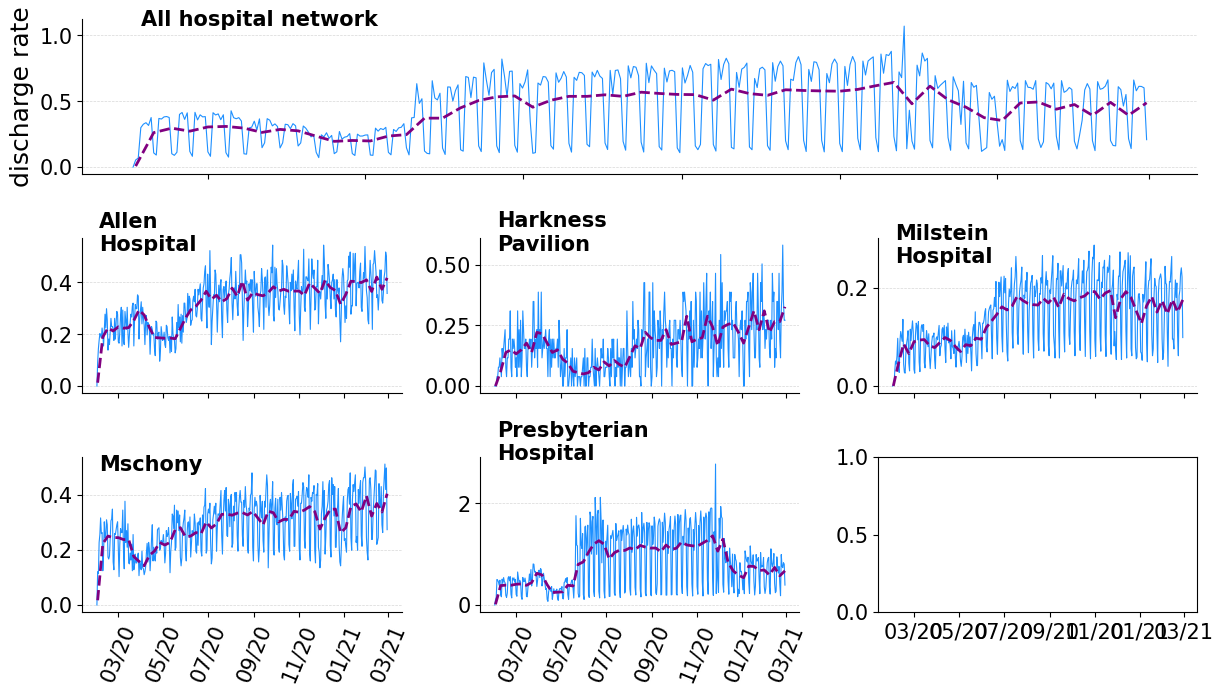

In [27]:
from matplotlib import dates as mdates
from utils_local import plot_utils
import matplotlib.pyplot as plt

fig, axes = plt.subplot_mosaic([["hospital", "hospital", "hospital"],
                               [selected_buildings[0], selected_buildings[1], selected_buildings[2]],
                               [selected_buildings[3], selected_buildings[4], selected_buildings[5]]],
                              figsize=(12.5, 7.2), sharex=True, sharey=False)

hosp_df = buildings_plt_df.groupby(['date']).sum().reset_index()
axes["hospital"].plot(hosp_df.date, hosp_df.num_discharged / (pop.sum()), color="dodgerblue", lw=0.8)

hosp_df        = hosp_df.set_index("date").resample("W-Sun").sum().reset_index()
axes["hospital"].plot(hosp_df.date, hosp_df.num_discharged / (7*pop.sum()), color="purple", lw=2, ls="--")

axes["hospital"].tick_params(which='both', axis='x', labelrotation=75)
axes["hospital"].xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
axes["hospital"].spines['right'].set_visible(False)
axes["hospital"].spines['top'].set_visible(False)
axes["hospital"].set_ylabel(None)
axes["hospital"].set_xlabel(None)
axes["hospital"].grid(axis='y', alpha=0.5, lw=0.5, ls="--")
axes["hospital"].text(x  = 18296.0,
                      y  = axes["hospital"].get_ylim()[1]-0.05,
                      s          = "All hospital network",
                      fontweight = "bold")

axes["hospital"].set_ylabel("discharge rate")

for idx_b in range(5):
    axi      = axes[selected_buildings[idx_b]]
    building = selected_buildings[idx_b]
    b_df     = buildings_plt_df[buildings_plt_df.building2 == building]
    axi.plot(b_df.date, b_df.num_discharged / pop[building], color="dodgerblue", lw=0.8)

    b_df        = b_df.set_index("date").resample("W-Sun").sum().reset_index()
    axi.plot(b_df.date, b_df.num_discharged / (7*pop[building]), color="purple", lw=2, ls="--")

    axi.tick_params(which='both', axis='x', labelrotation=67.5)
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_ylabel(None)
    axi.set_xlabel(None)

    axi.text(x = 18296.0,
            y  = axi.get_ylim()[1]-0.05,
            s          = "\n".join(building.split(" ")),
            fontweight = "bold")

    axi.grid(axis='y', alpha=0.5, lw=0.5, ls="--")
plt.tight_layout()